# Deep Learning

[Deep Learning Slides](https://github.com/sheriffff/teaching-ironhack-data-madrid-2020/blob/main/week_08/deep_learning.pdf)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Deep-Learning-for-Computer-Vision" data-toc-modified-id="Deep-Learning-for-Computer-Vision-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Deep Learning for Computer Vision</a></span><ul class="toc-item"><li><span><a href="#The-models" data-toc-modified-id="The-models-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The models</a></span><ul class="toc-item"><li><span><a href="#Not-DL-model" data-toc-modified-id="Not-DL-model-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Not DL model</a></span></li><li><span><a href="#Artificial-neural-network" data-toc-modified-id="Artificial-neural-network-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Artificial neural network</a></span></li><li><span><a href="#Convolutional-neural-network-(CNN)" data-toc-modified-id="Convolutional-neural-network-(CNN)-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Convolutional neural network (CNN)</a></span></li></ul></li><li><span><a href="#Pretrained-nets" data-toc-modified-id="Pretrained-nets-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Pretrained nets</a></span></li></ul></li><li><span><a href="#Deep-Learning-for-NLP-(natural-language-processing)" data-toc-modified-id="Deep-Learning-for-NLP-(natural-language-processing)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Deep Learning for NLP (natural language processing)</a></span></li></ul></div>

In [2]:
from tensorflow import keras

In [3]:
import matplotlib.pyplot as plt

## Deep Learning for Computer Vision

Lets make use of the Python library `tensorflow.keras` to learn to classify hand-written digits

The problem: classification in the MNIST dataset
 * **classify** grayscale images 
 * of handwritten digits
 * 28 pixels by 28 pixels
 * into their 10 categories (0 to 9)

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [4]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
type(train_images)

numpy.ndarray

In [6]:
train_images.shape

(60000, 28, 28)

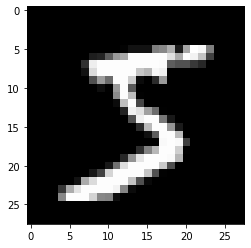

In [7]:
plt.imshow(train_images[0], cmap="gray")

In [8]:
train_labels[0]

5

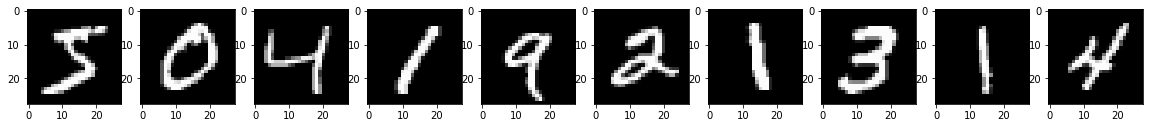

In [9]:
n_images = 10
fig, axs = plt.subplots(1, n_images, figsize=(20, 20))
for i in range(n_images):
    axs[i].imshow(train_images[i], cmap="gray")

In [10]:
train_labels[:n_images]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

### The models

#### Not DL model

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
X_train = train_images.reshape(train_images.shape[0], -1)
X_test = test_images.reshape(test_images.shape[0], -1)

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_images[0].shape

(28, 28)

In [17]:
X_train.shape

(60000, 784)

In [18]:
X_train[0].shape

(784,)

In [19]:
model = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid={
        "n_estimators": [200, 400],
        "max_depth": [4, 6, 9, 12],
    },
    cv=3,
    verbose=True,
    return_train_score=True,
    n_jobs=-1
)

In [20]:
model = GradientBoostingClassifier(n_estimators=10, max_depth=5, max_features=0.1)

In [85]:
model.fit(X_train, train_labels)

GradientBoostingClassifier(max_depth=5, max_features=0.1, n_estimators=10)

In [86]:
model.score(X_train, train_labels)

0.9152666666666667

#### Artificial neural network

Our workflow will be as follow: 
 * first we will present our neural network with the training data, `train_images` and `train_labels`...
 * this way, the network will then learn to associate images and labels
 * finally, we will ask the network to produce predictions for `test_images`...
 * and we will verify if these predictions match the labels from `test_labels`

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [22]:
network = models.Sequential()

In [23]:
type(network)

tensorflow.python.keras.engine.sequential.Sequential

 * The core building block of neural networks is the **layer**
 * Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers
 * The second (and last) layer is a 10-way "softmax" layer, which means...
 * it will return an array of 10 probability scores (summing to 1)
 * each score being the probability that the current digit image belongs to one of our 10 digit classes.

In [24]:
network.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

 * A **loss function** (differentiable metric): this is how the network will be able to measure how good a job it is doing on its training data
 * An **optimizer**: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
 * **Metrics** to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified

In [25]:
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Before training:
 * reshape every 28x28 image into a 784 vector
 * scaling it so that all values are in the `[0, 1]` interval

In [26]:
train_vectors = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_vectors = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

We also need to categorically encode the labels, a step which we explain in chapter 3:

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [29]:
train_labels_hot = to_categorical(train_labels)
test_labels_hot = to_categorical(test_labels)

In [30]:
train_labels_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [31]:
train_labels[0]

5

In [32]:
train_labels_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [33]:
%%time
network.fit(train_vectors, train_labels_hot, epochs=10, batch_size=128, validation_split=0.1)
# no gpu

Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3028 - accuracy: 0.9151 - val_loss: 0.1381 - val_accuracy: 0.9620
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1351 - accuracy: 0.9601 - val_loss: 0.0983 - val_accuracy: 0.9723
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0918 - accuracy: 0.9729 - val_loss: 0.0838 - val_accuracy: 0.9765
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0689 - accuracy: 0.9793 - val_loss: 0.0784 - val_accuracy: 0.9775
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0540 - accuracy: 0.9840 - val_loss: 0.0736 - val_accuracy: 0.9768
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0431 - accuracy: 0.9876 - val_loss: 0.0694 - val_accuracy: 0.9805
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0352 - accuracy: 0.9898 - val_loss: 0.0676 - val_accuracy: 0.9818
Epoch 

In [34]:
_, test_acc = network.evaluate(test_vectors, test_labels_hot)

313/313 [==============================] - 0s 1ms/step - loss: 0.0740 - accuracy: 0.9796


In [35]:
test_acc

0.9796000123023987

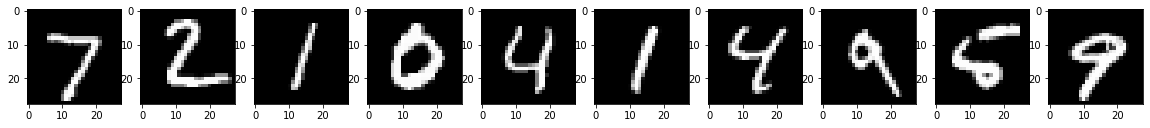

In [36]:
n_images = 10
fig, axs = plt.subplots(1, n_images, figsize=(20, 20))
for i in range(n_images):
    axs[i].imshow(test_images[i], cmap="gray")

Some examples

In [37]:
test_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [38]:
np.argmax(network.predict(test_vectors), axis=-1)[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

Some examples not correctly predicted

In [39]:
error_indices = np.argwhere(test_labels[:1000] != np.argmax(network.predict(test_vectors), axis=-1)[:1000]).flatten()

In [40]:
error_indices

array([247, 321, 381, 445, 495, 582, 583, 613, 619, 659, 684, 691, 720,
       726, 786, 938, 944, 947, 951, 965])

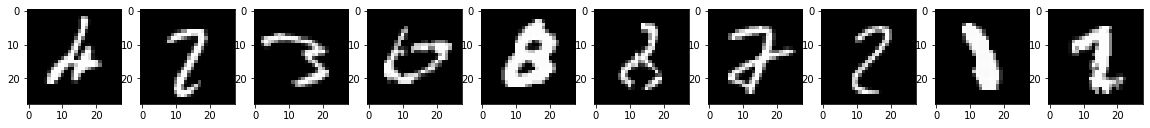

In [41]:
n_images = 10
fig, axs = plt.subplots(1, n_images, figsize=(20, 20))
for i, index in zip(range(n_images), error_indices):
    axs[i].imshow(test_images[index], cmap="gray")

In [42]:
test_labels[error_indices][:10]

array([4, 2, 3, 6, 8, 8, 2, 2, 1, 2], dtype=uint8)

In [43]:
np.argmax(network.predict(test_vectors[error_indices]), axis=-1)[:10]

array([6, 7, 7, 0, 0, 2, 7, 8, 8, 1])

Explore the network

In [44]:
network.layers[0].get_weights()[0].shape

(784, 256)

In [45]:
network.layers[0].get_weights()[1].shape

(256,)

#### Convolutional neural network (CNN)

In [46]:
model = models.Sequential()

In [47]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [53]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [54]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [55]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 20s 23ms/step - loss: 0.1847 - accuracy: 0.9419 - val_loss: 0.0534 - val_accuracy: 0.9858
Epoch 2/10
844/844 [==============================] - 19s 23ms/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0472 - val_accuracy: 0.9867
Epoch 3/10
844/844 [==============================] - 18s 22ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0332 - val_accuracy: 0.9910
Epoch 4/10
844/844 [==============================] - 19s 23ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.0356 - val_accuracy: 0.9918
Epoch 5/10
844/844 [==============================] - 18s 21ms/step - loss: 0.0200 - accuracy: 0.9941 - val_loss: 0.0427 - val_accuracy: 0.9895
Epoch 6/10
844/844 [==============================] - 20s 23ms/step - loss: 0.0157 - accuracy: 0.9953 - val_loss: 0.0425 - val_accuracy: 0.9910
Epoch 7/10
844/844 [==============================] - 18s 22ms/step - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0328 - val_accuracy:

In [59]:
_, test_acc = model.evaluate(test_images, test_labels_hot)

313/313 [==============================] - 1s 4ms/step - loss: 0.0342 - accuracy: 0.9914


In [60]:
test_acc

0.9914000034332275

 * Before we had 98% accuracy
 * Now we have 99% accuracy
 * Meaning 50% of previous errors are now correct

Some examples

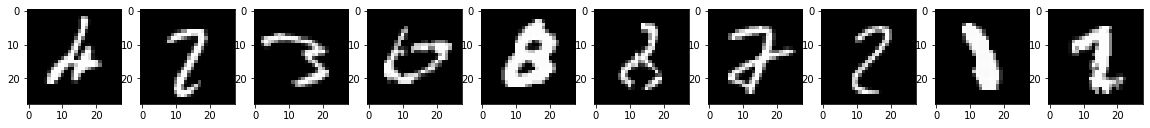

In [63]:
n_images = 10
fig, axs = plt.subplots(1, n_images, figsize=(20, 20))
for i, index in zip(range(n_images), error_indices):
    axs[i].imshow(test_images[index], cmap="gray")

In [65]:
np.argmax(test_labels[error_indices], axis=-1)[:10]

array([4, 2, 3, 6, 8, 8, 2, 2, 1, 2])

Old model

In [66]:
np.argmax(network.predict(test_vectors[error_indices]), axis=-1)[:10]

array([6, 7, 7, 0, 0, 2, 7, 8, 8, 1])

New model

In [68]:
np.argmax(model.predict(test_images[error_indices]), axis=-1)[:10]

array([4, 7, 3, 0, 8, 8, 7, 2, 1, 1])

### Pretrained nets

In [70]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

In [71]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

## Deep Learning for NLP (natural language processing)

The building block of Deep Learning for NLP are word embeddings (as explained in the slides)

In [74]:
import gensim

In [76]:
%%time
model = gensim.models.KeyedVectors.load_word2vec_format('../../../Documents/coding/selenium/word2vec.300d.W.pos.vectors', binary=False)

CPU times: user 2min 8s, sys: 1.27 s, total: 2min 10s
Wall time: 2min 10s


In [97]:
word = "queen"

In [98]:
word_vector = model[word]

In [99]:
word_vector

array([-4.84460e-02,  1.02613e-01, -1.95860e-02,  1.13386e-01,
       -4.06010e-02,  9.26370e-02,  1.50780e-02, -2.57814e-01,
       -4.70070e-02,  3.18180e-02,  5.47950e-02,  3.53900e-03,
       -7.56470e-02,  4.45500e-02, -1.21290e-02,  2.11295e-01,
        6.03500e-03,  3.54547e-01,  6.95730e-02,  6.87930e-02,
        2.37840e-02, -7.69080e-02,  2.12900e-03,  1.14084e-01,
       -8.91960e-02, -5.41190e-02, -1.05277e-01, -1.41408e-01,
       -8.05910e-02, -3.14660e-02, -1.09331e-01,  2.80780e-02,
        3.59570e-02, -8.68410e-02,  1.75902e-01, -3.23001e-01,
        1.77420e-02, -7.86520e-02, -1.50684e-01,  4.33200e-02,
       -2.26360e-02, -2.68887e-01, -2.04072e-01,  1.22233e-01,
       -2.54441e-01, -1.79420e-02, -2.07564e-01, -5.47420e-02,
       -2.36425e-01, -1.36054e-01, -1.18586e-01,  1.00000e-03,
       -2.36707e-01,  2.73251e-01,  2.83630e-02,  4.60200e-03,
        2.48529e-01, -1.46228e-01,  8.82730e-02, -5.56100e-02,
        1.85684e-01, -4.69280e-02, -1.54934e-01,  1.680

In [100]:
word_vector.shape

(300,)

In [101]:
other_words = ["dog", "king", "god", "cream", "princess"]

In [102]:
other_words_vectors = [model[w] for w in other_words]

In [103]:
similarities = model.cosine_similarities(
    word_vector, 
    other_words_vectors
)

In [104]:
similarities

array([0.11103875, 0.6313495 , 0.17146927, 0.06811734, 0.64820254],
      dtype=float32)

In [107]:
most_similar = other_words[similarities.argmax()]

In [108]:
most_similar

'princess'